Object `Hex.line()` not found.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *
from matplotlib.patches import Ellipse


## Algorithm Steps

1. Take a point in Edge 4 (bottom edge) near the middle.
2. Take 1-2 points in Edges 3, 2, 1, 0, and 5
3. Form Polygons emp, vertex, pt etc.
4. Texture/color the Polygon



## Try it on one Hexagon

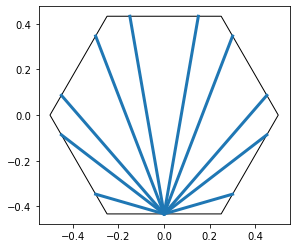

In [15]:
h0 = Hex(0, 0, size=0.5)
h0.render(fc='none', color='k')
start_edge = 'e4'
for ende in ['e3', 'e2', 'e1', 'e0', 'e5'  ]:
    for dist in [0.2, 0.8]:
        h0.line(start_point=start_edge, end_point=ende, start_pos='mid', end_pos=dist, lw=3)
    
    
plt.axis('scaled');

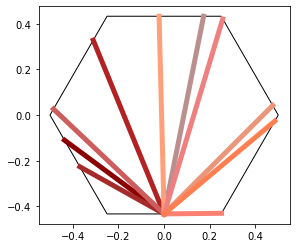

In [33]:
h0 = Hex(0, 0, size=0.5)
h0.render(fc='none', color='k')
start_edge = 'e4'
cfam = RED_BROWNS
col_index = 0
for ende in ['e3', 'e2', 'e1', 'e0', 'e5'  ]:
    for epts in range(2):
        start_a = epts/2
        dist = np.random.uniform(start_a, start_a+0.5)        
        col_index += 1
        color = cfam[col_index%len(cfam)]
        
        h0.line(start_point=start_edge, end_point=ende, start_pos='mid', end_pos=dist, lw=5,
               color=color)
    
    
plt.axis('scaled');

## Let's create Polygons

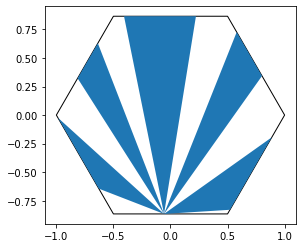

In [107]:
debug=False
h0 = Hex(0, 0, size=1)
h0.render(fc='none', color='k')
fan_base = 4
cfam = RED_BROWNS
col_index = 0
        

fb = h0.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

new_pts = []
for index in range(6):
    if index!=fan_base:
        p = h0.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
        q = h0.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
        if debug:
            plt.plot(*p, 'ro')    
            plt.plot(*q, 'mo')    
        new_pts.extend([p, q])
    
#print(new_pts)

for p in range(0, len(new_pts), 2):
    #print(new_pts[p], new_pts[p+1])
    pt_list= [new_pts[p], new_pts[p+1], fb]
    h0.render_polygon(pt_list, include_center=False, ax=None)



plt.axis('scaled');

In [84]:
def hex_cookie_cutter(h, colors, ax, **kwargs):
    ''' This one just draws lines from fanbase to edge points'''

    if ax is None:
        ax = plt.gca()

    alle = ['e'+str(x) for x in range(6)]
    
    cfam = get_rnd_family() 
    for fan_base in ['e1', 'e3', 'e5']:    
        col_index = 0
        for ende in [e for e in alle if e!= fan_base]:
            for epts in range(2):
                start_a = epts/2
                dist = np.random.uniform(start_a, start_a+0.5)        
                col_index += 1
                color = get_rnd_color_from_family(cfam)
                h.line(start_point=fan_base, end_point=ende, start_pos='mid', end_pos=dist, lw=3,
                       color=color)
        
    return ax,


In [66]:
fan_base = 'e4'
alle = ['e'+str(x) for x in range(6)]
[e for e in alle if e!= fan_base]


['e0', 'e1', 'e2', 'e3', 'e5']

In [108]:
def hex_cookie_cutter(h, colors, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = 4
    cfam = get_rnd_family() 
    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    new_pts = []
    for index in range(6):
        if index!=fan_base:
            p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
            q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
            new_pts.extend([p, q])

    for p in range(0, len(new_pts), 2):
        #print(new_pts[p], new_pts[p+1])
        pt_list= [new_pts[p], new_pts[p+1], fb]
        h.render_polygon(pt_list, include_center=False, ax=ax, fc = get_rnd_color_from_family(cfam))
        
    return ax,


# Fan Variations
1. Each Hex is identical
2. 1 vs 2 points in each Edge
3. Vertices form triangles, or quads
4. Smaller Polygons inside each (echo chamber)
5. Color Variations
6. Color only alternate Polygons
6. Multiple Fan origin


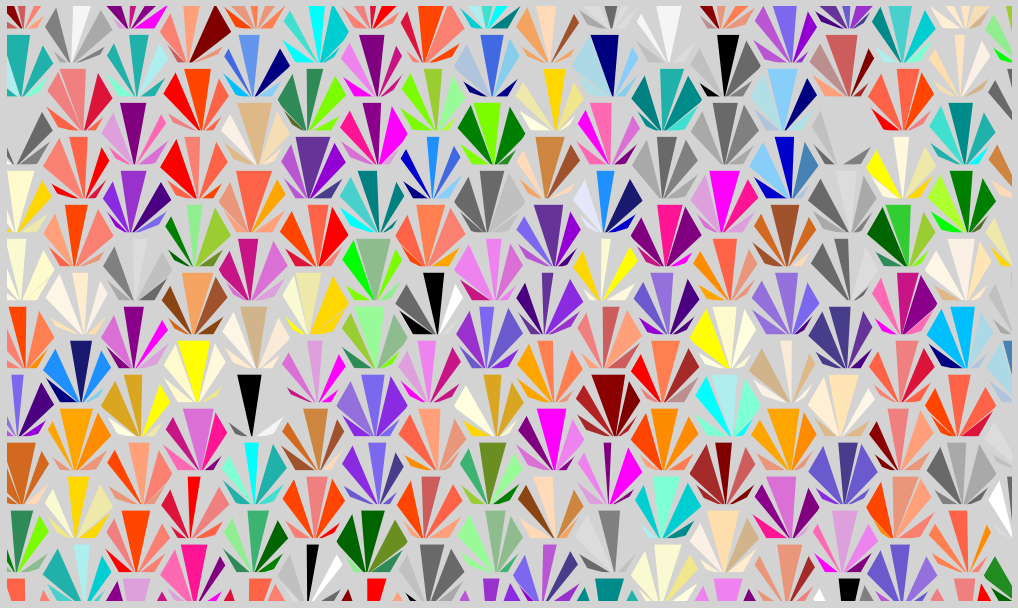

In [109]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 19
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'lightgray'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 25, 16
    
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    COL = PURPLES + BLUES_HIGH_SAT 
    COL = get_rnd_family() 
    #    COL = HIGH_SAT
    for h in hg.hlist:
        hex_cookie_cutter(h, COL, ax)
        h.render(fill=None, lw=6, color=bg_color, zorder=3)
    
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Japanese_fan_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()
